In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.float_format = '{:f}'.format

In [177]:
from scipy.stats import gaussian_kde, trimboth, trim1
from scipy.stats import rv_continuous
from scipy.stats import expon, norminvgauss, norm, laplace_asymmetric, cauchy, gennorm, johnsonsu, nct, fatiguelife, exponweib, betaprime, exponpow, invgauss, invgamma, genexpon 

In [178]:
import scipy.stats
from scipy.stats import kstest, probplot
import multiprocessing
import warnings
import signal

In [179]:
def inheritors(klass):
    subclasses = set()
    work = [klass]
    while work:
        parent = work.pop()
        for child in parent.__subclasses__():
            name = child.__name__
            if name not in subclasses:
                subclasses.add(name)
                work.append(child)
    return subclasses
result = list(sorted(map(str, inheritors(rv_continuous))))
dist_names = [x[:-4] for x in result]

In [180]:
def find_distribution(d: np.array, timeout=50):
    warnings.filterwarnings('ignore')
    run = [False]
    start = 0

    def signal_handler(signum, frame):
        if run:
            raise RuntimeError("Timed out!")

    signal.signal(signal.SIGALRM, signal_handler)

    for dist_name in dist_names[start:]:
        try:
            dist = getattr(scipy.stats, dist_name)
        except:
            print("Not found: ", dist_name)
            continue
        try:
            signal.alarm(timeout)
            run[0] = True
            p = dist.fit(d)
        except RuntimeError as e:
            print("Timeout: ", dist_name)
            continue
        except Exception as e:
            print("Error: ", dist_name, e)
            continue
        finally:
            run[0] = False
            signal.alarm(0)
        res = kstest(d, dist(*p).cdf)
        if res.pvalue > 0.0:
            print(dist_name, "pvalue=", res.pvalue, p)
        else:
            print(dist_name, "fail", res.pvalue)

In [333]:
full_df = pd.read_csv('cell2celltrain.csv')
full_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [334]:
df = full_df.dropna()
df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,...,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000
mean,3200957.682907,58.717374,525.021466,46.834961,0.891841,39.754040,1.226327,-11.656175,-1.175937,6.010556,...,1.805093,1.558711,380.020843,31.338258,21.147592,0.035496,0.018331,0.051475,4.402677,0.053686
std,116469.396546,44.317244,528.510155,23.759492,2.224725,96.091606,9.848360,255.858193,39.392124,9.036653,...,1.330834,0.906256,252.290072,22.091593,23.926589,0.201964,0.142854,0.266490,3.110498,0.382677
min,3000002.000000,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3100094.000000,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.000000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3200144.000000,48.380000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,330.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3303643.000000,70.910000,722.000000,60.000000,0.990000,40.000000,0.300000,65.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3399974.000000,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,16.000000,9.000000,25.000000


In [335]:
def prepare_data(df: pd.DataFrame,
                 feature: str, 
                 left_quanlile: float = 0.001, 
                 right_quanlile: float = 0.001) -> np.array:
    data = df[feature].to_numpy()
    data = trim1(data, left_quanlile, 'left')
    data = trim1(data, right_quanlile, 'right')
    return data

CustomerID


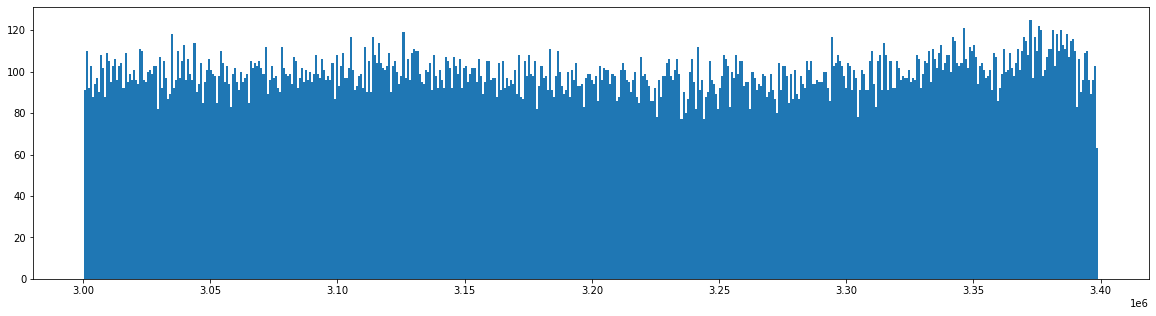

Churn


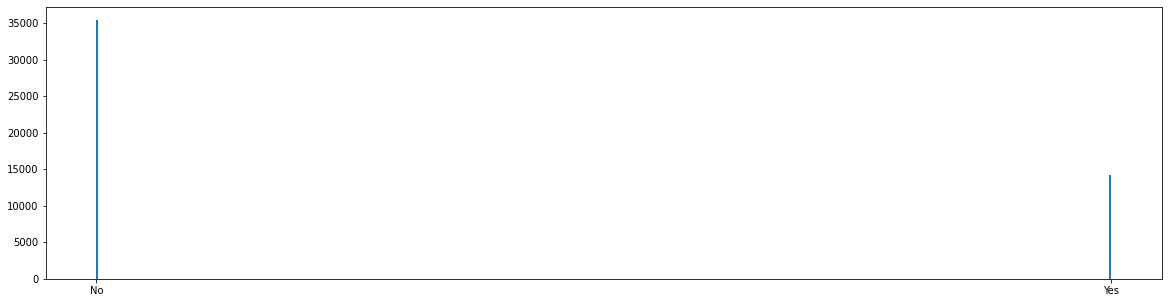

MonthlyRevenue


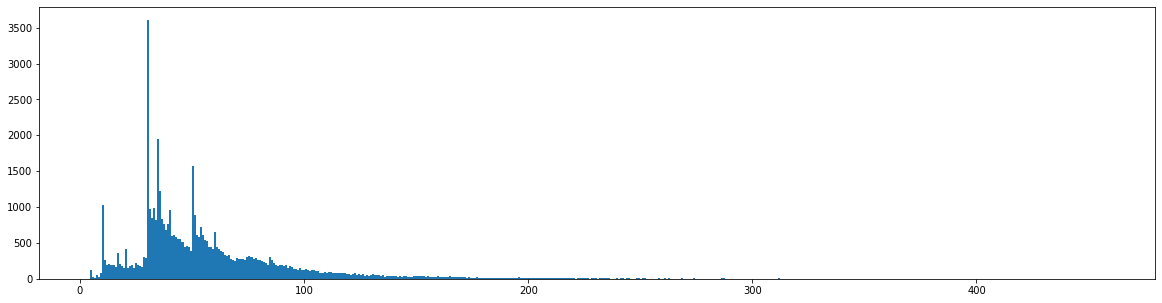

MonthlyMinutes


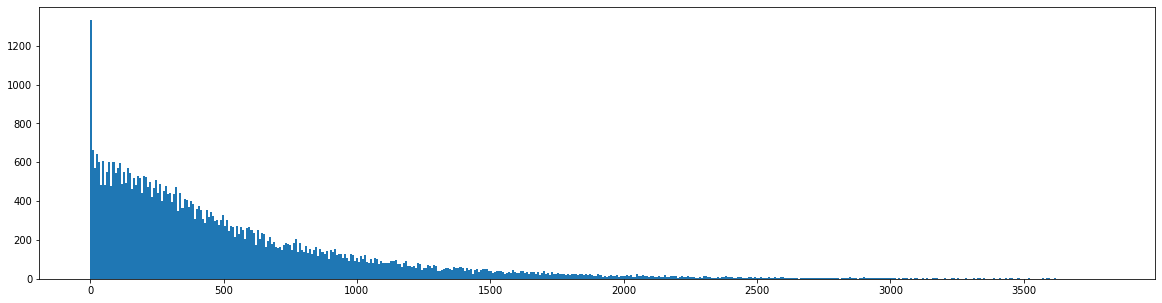

TotalRecurringCharge


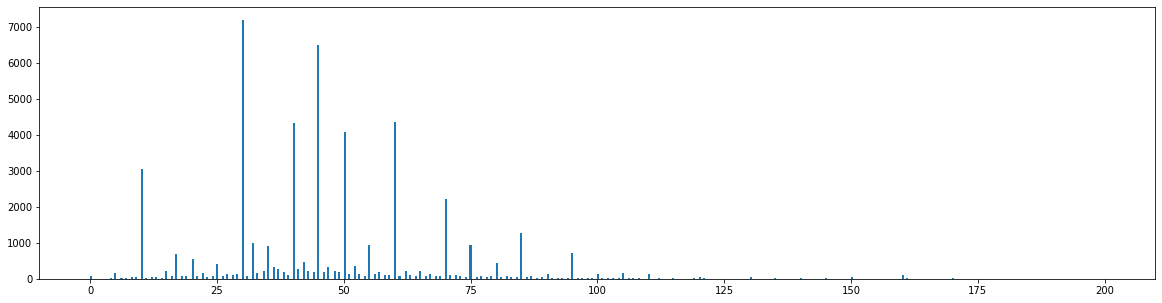

DirectorAssistedCalls


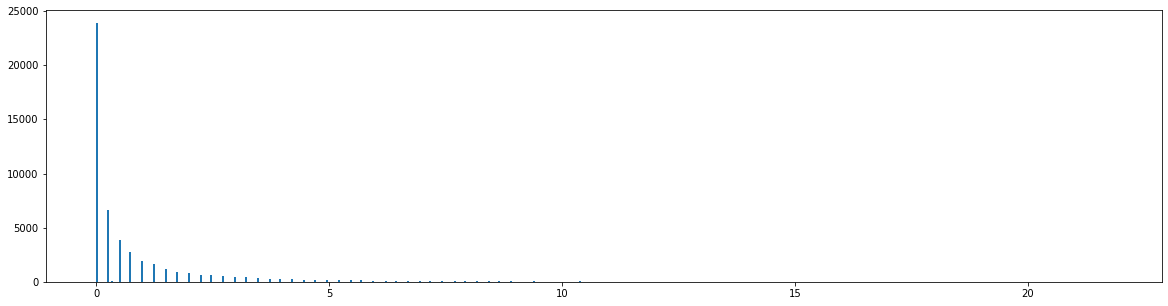

OverageMinutes


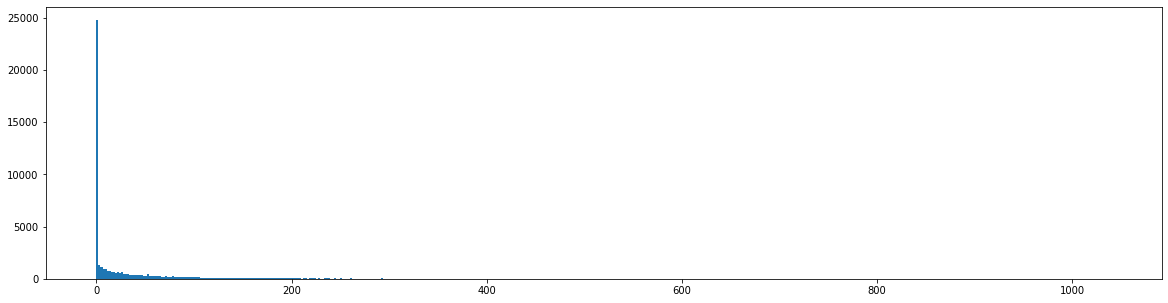

RoamingCalls


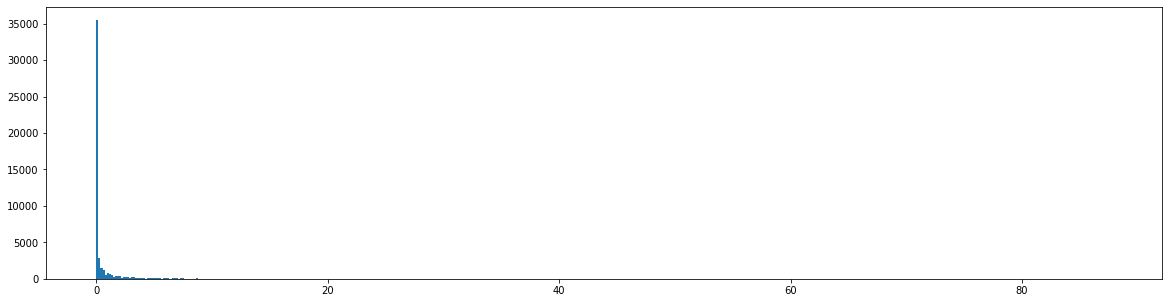

PercChangeMinutes


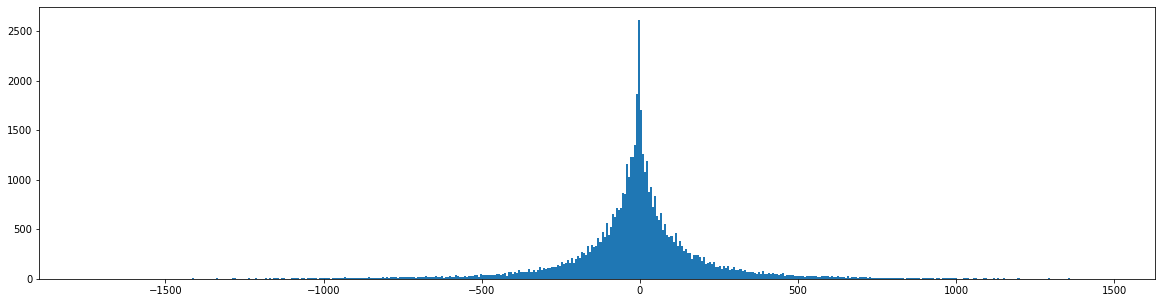

PercChangeRevenues


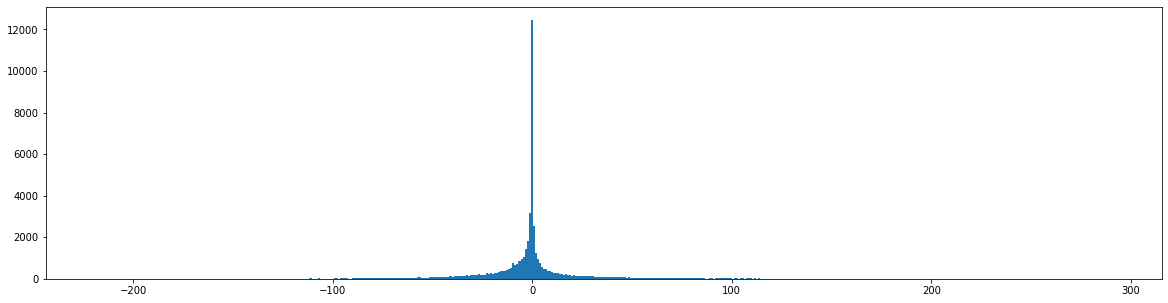

DroppedCalls


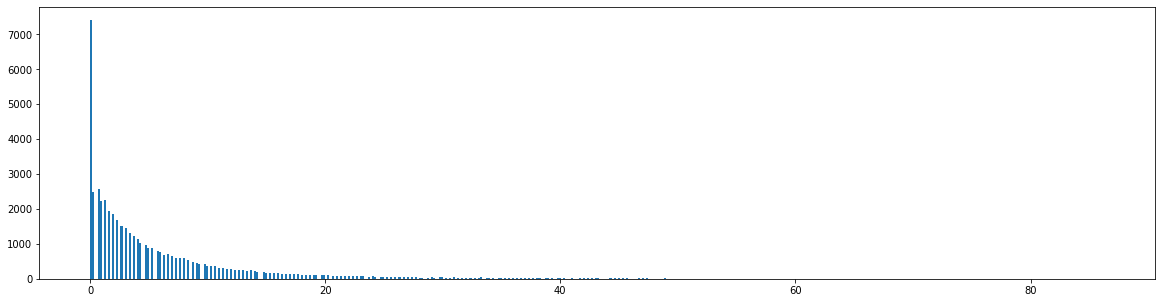

BlockedCalls


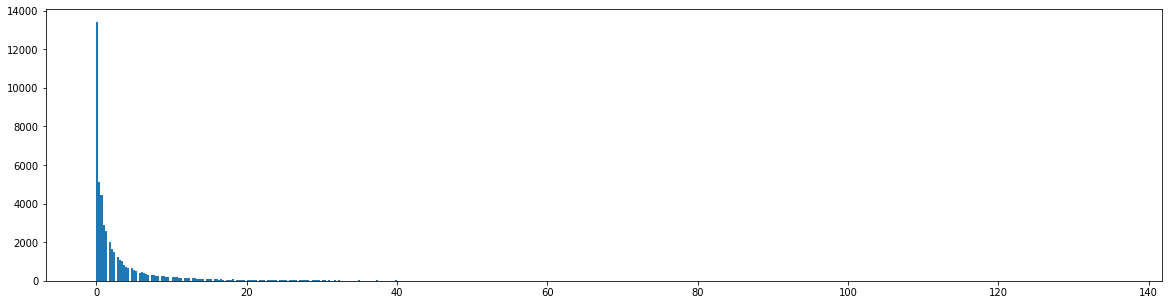

UnansweredCalls


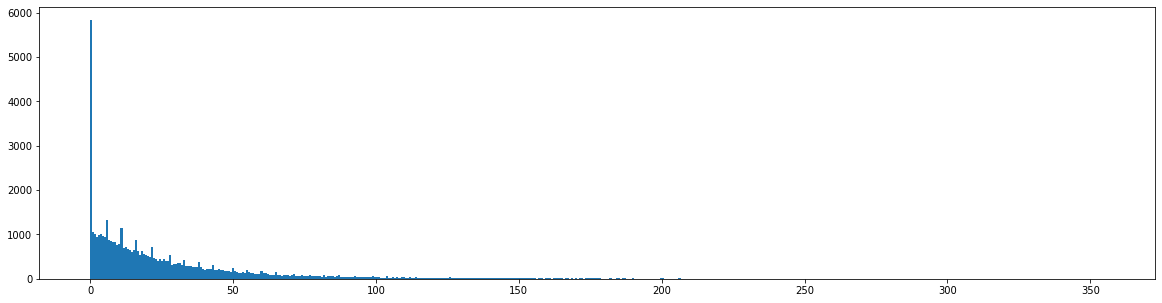

CustomerCareCalls


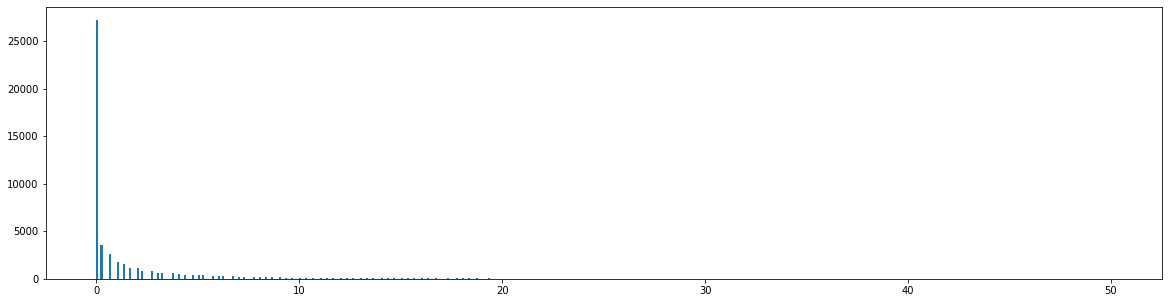

ThreewayCalls


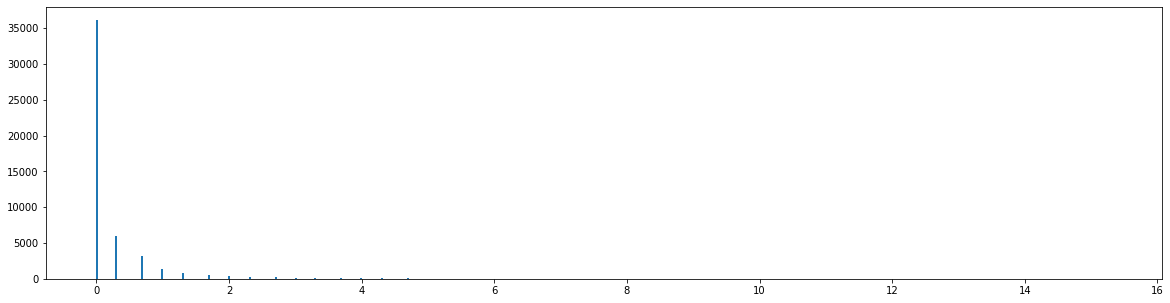

ReceivedCalls


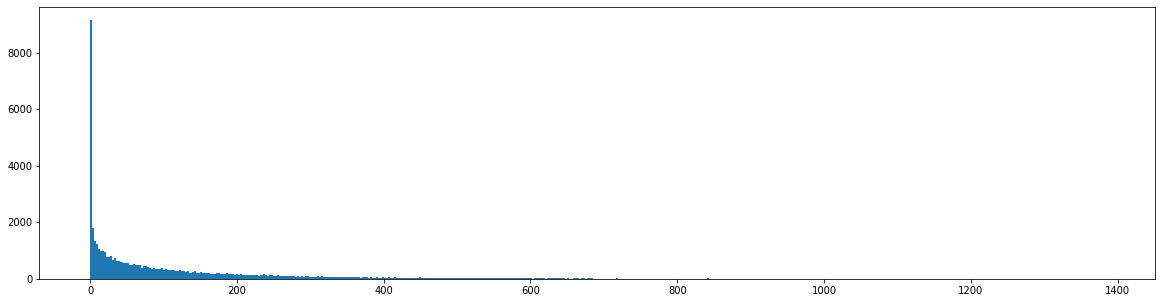

OutboundCalls


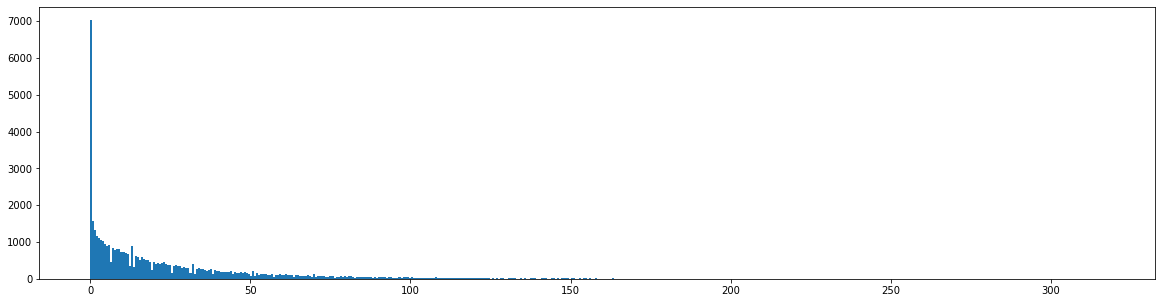

InboundCalls


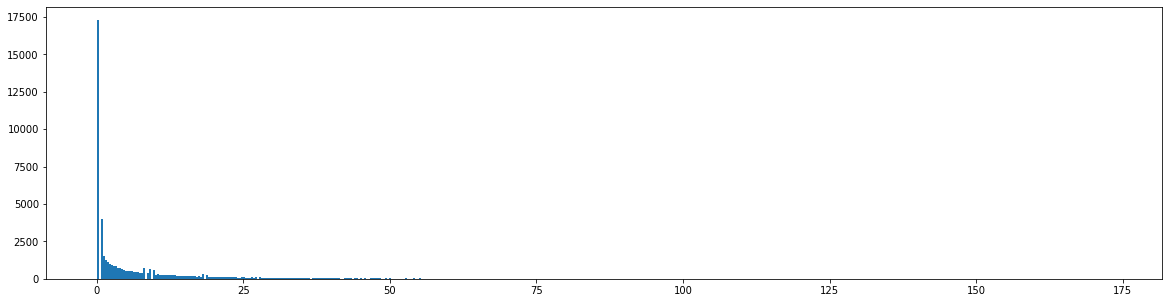

PeakCallsInOut


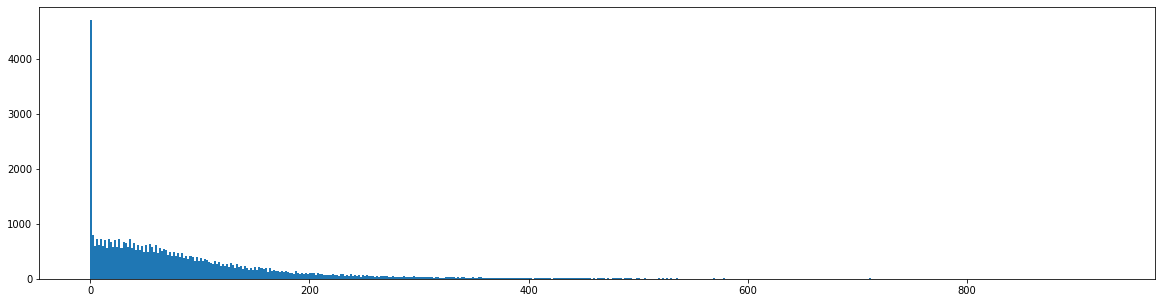

OffPeakCallsInOut


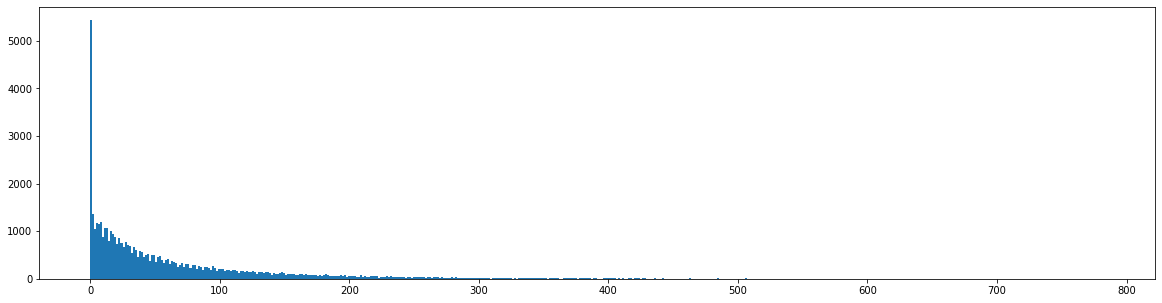

DroppedBlockedCalls


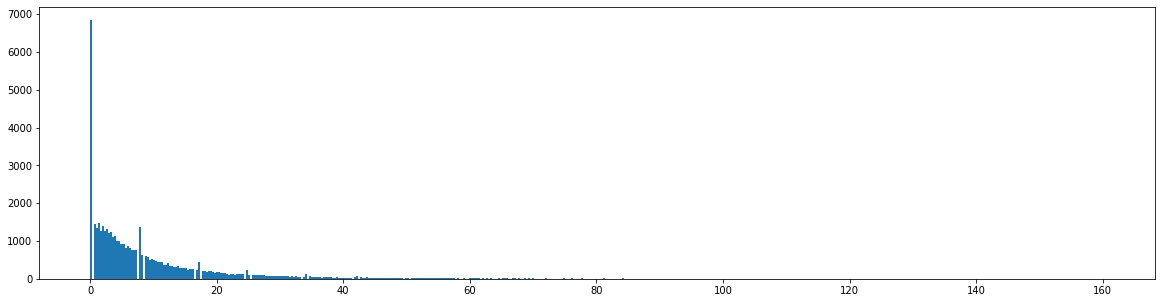

CallForwardingCalls


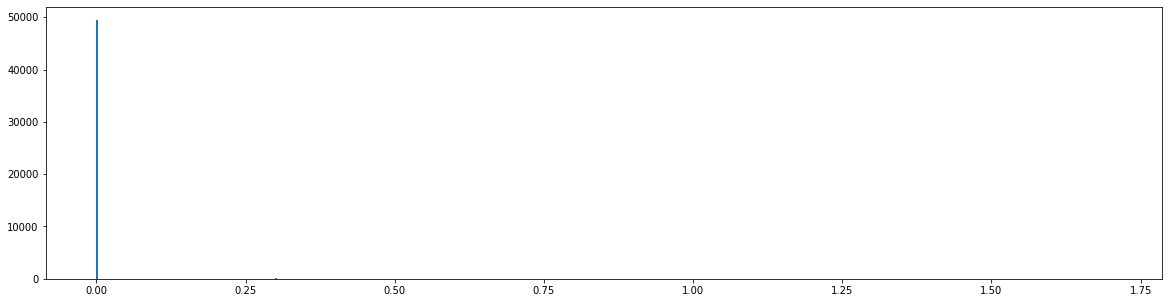

CallWaitingCalls


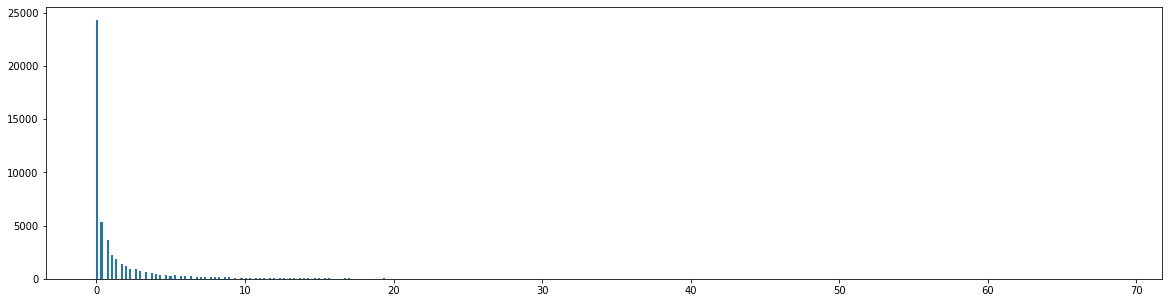

MonthsInService


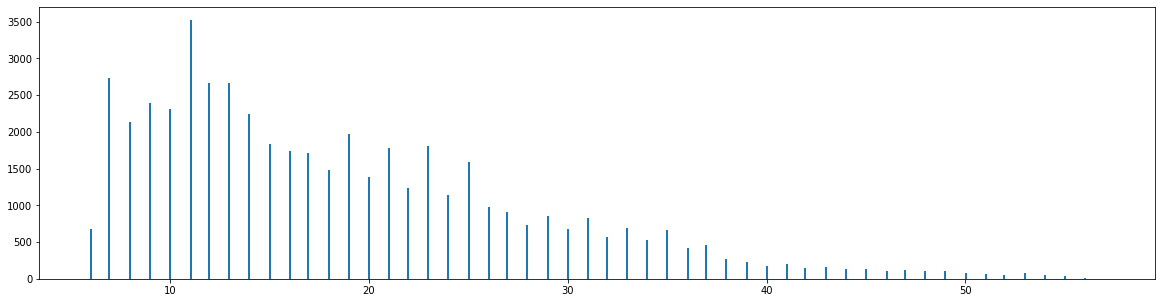

UniqueSubs


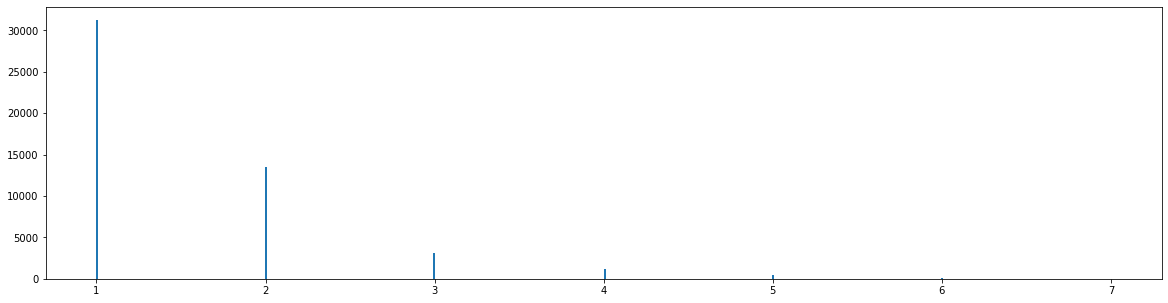

ActiveSubs


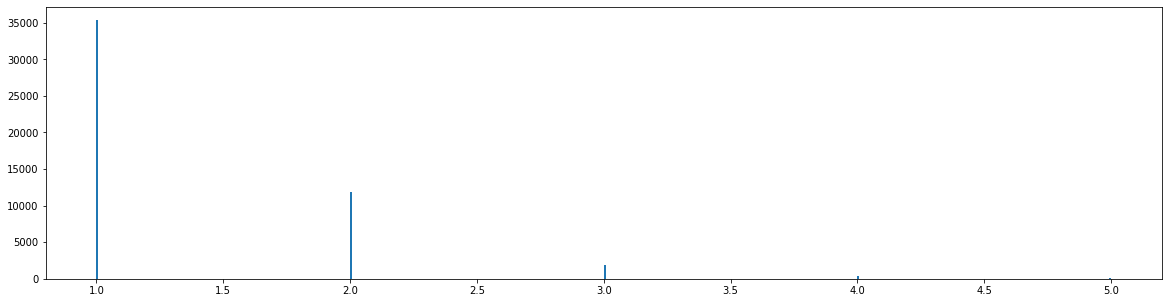

ServiceArea


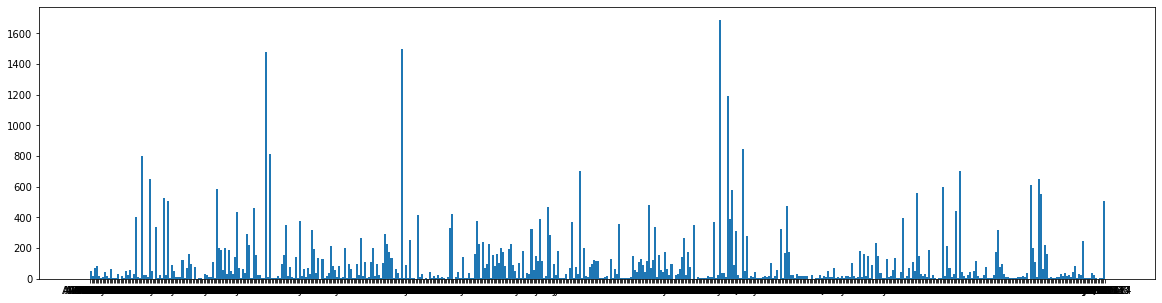

Handsets


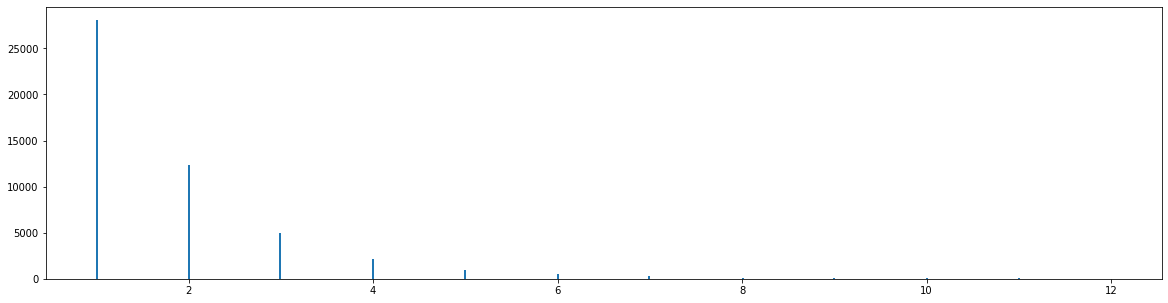

HandsetModels


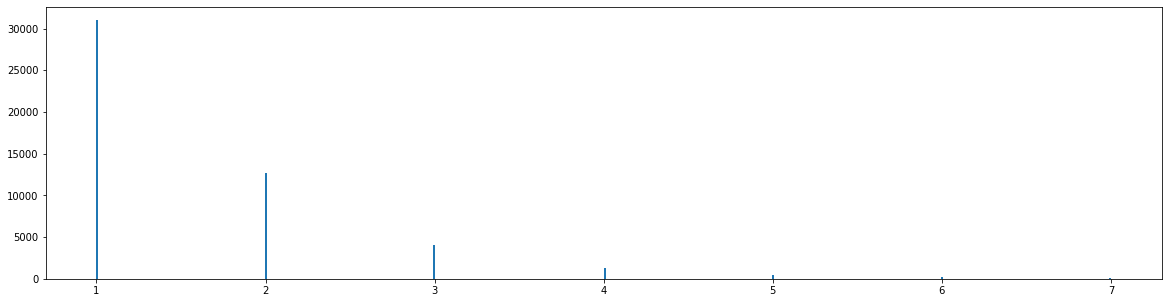

CurrentEquipmentDays


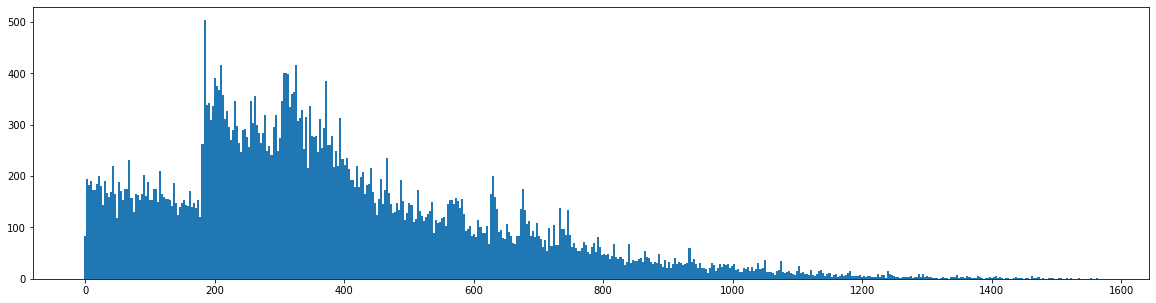

AgeHH1


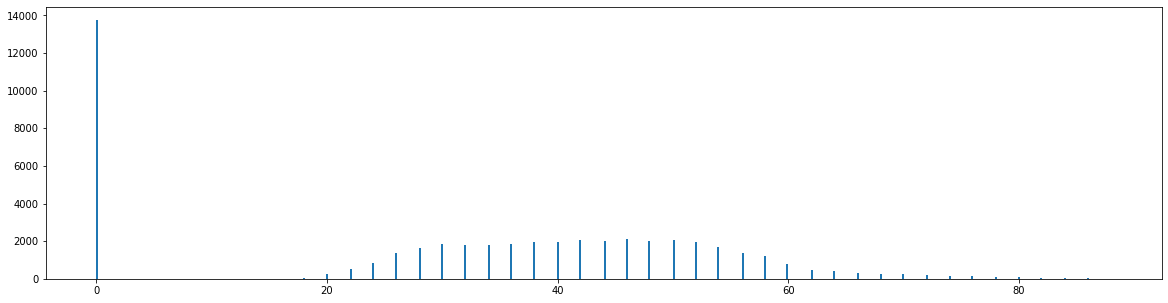

AgeHH2


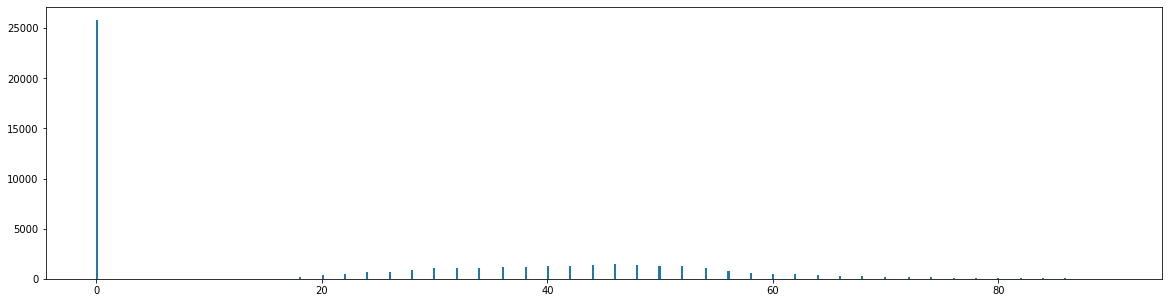

ChildrenInHH


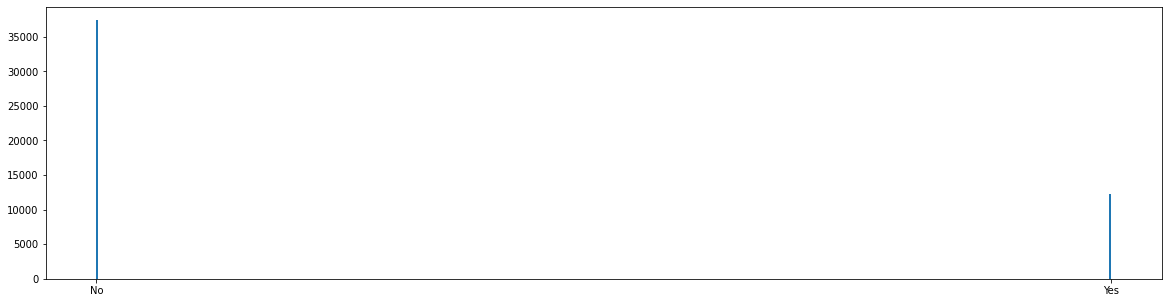

HandsetRefurbished


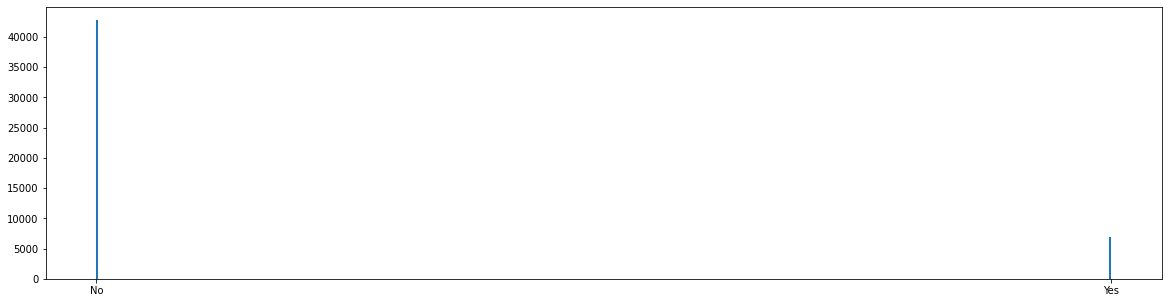

HandsetWebCapable


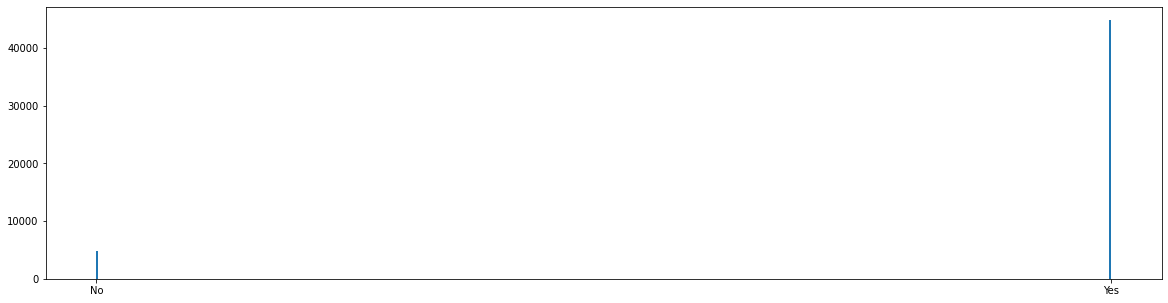

TruckOwner


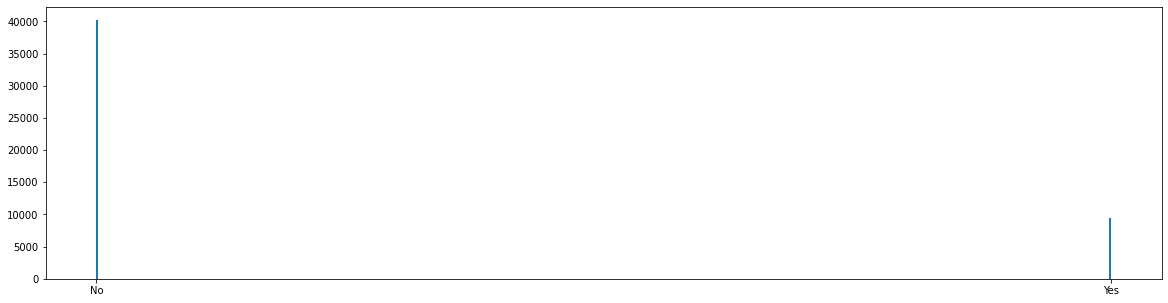

RVOwner


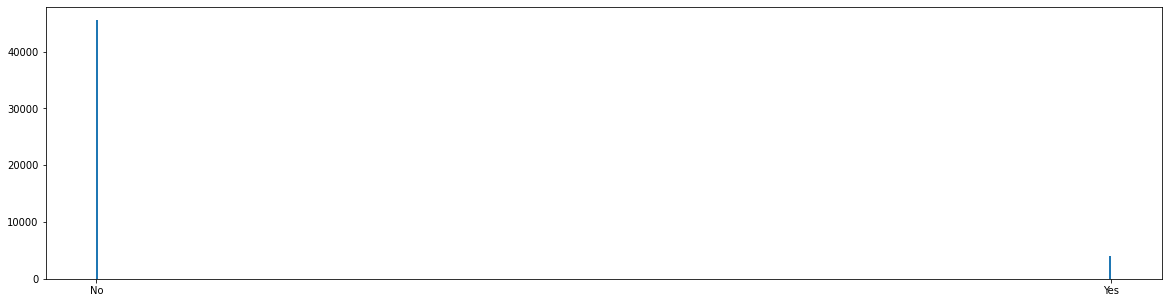

Homeownership


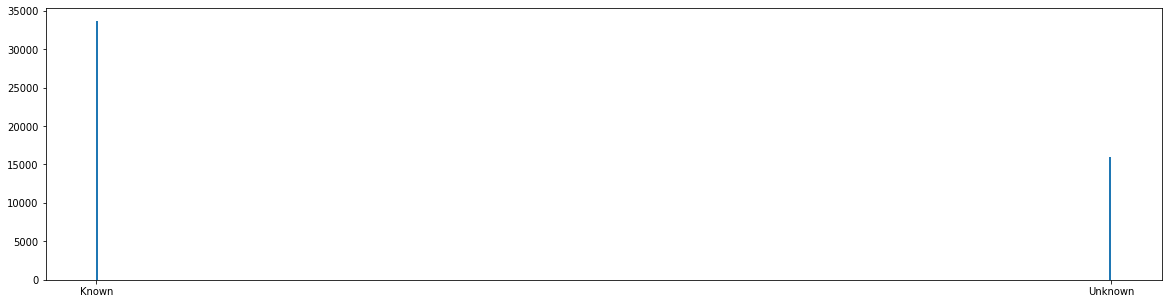

BuysViaMailOrder


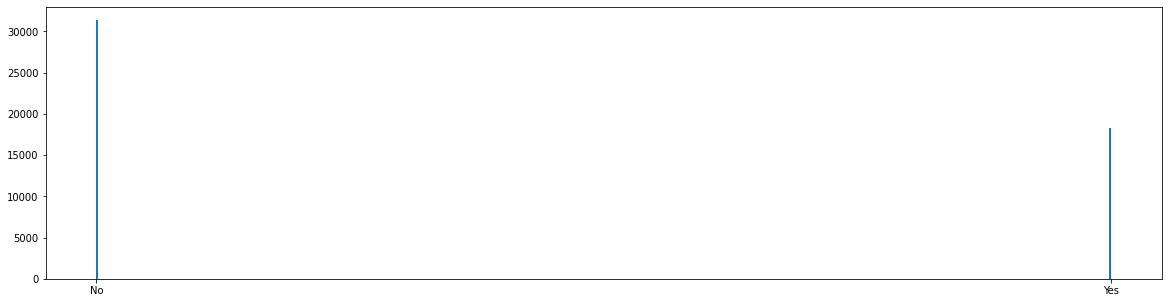

RespondsToMailOffers


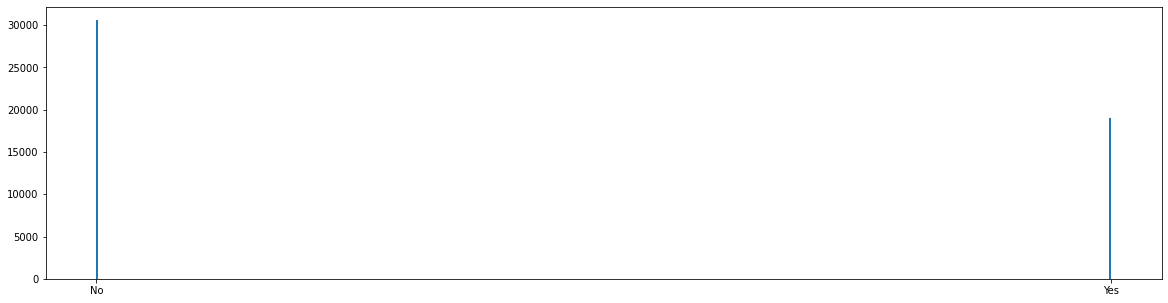

OptOutMailings


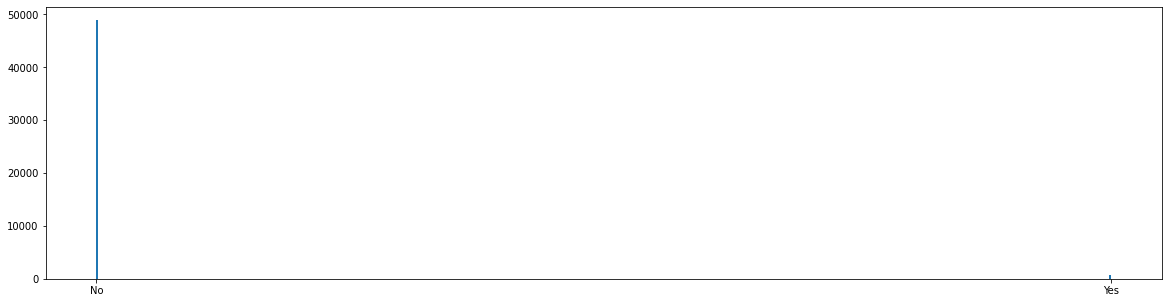

NonUSTravel


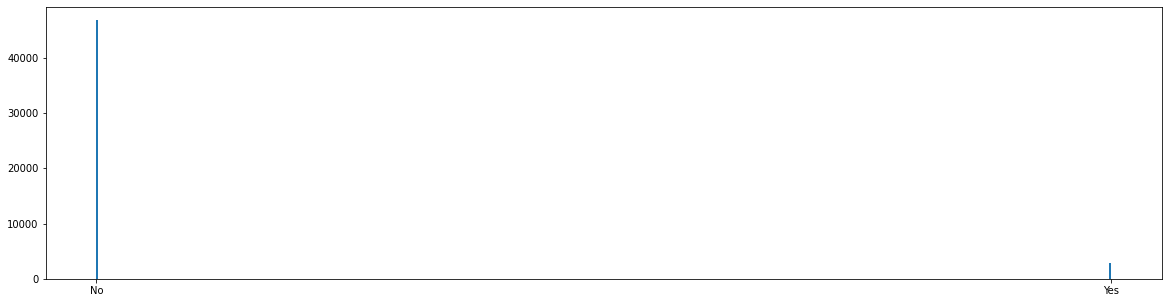

OwnsComputer


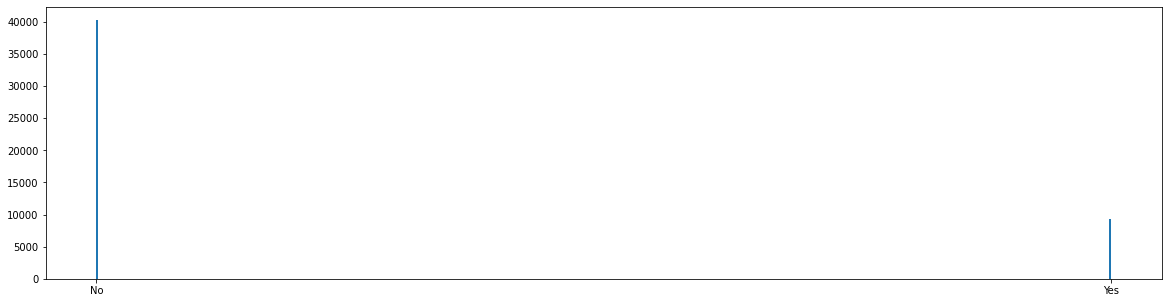

HasCreditCard


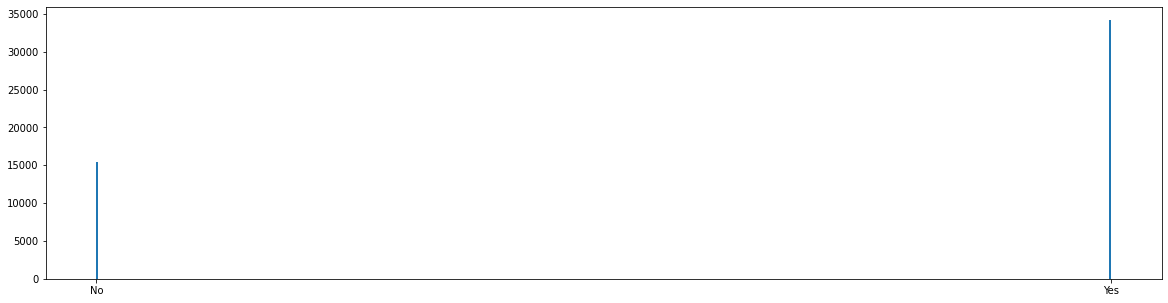

RetentionCalls


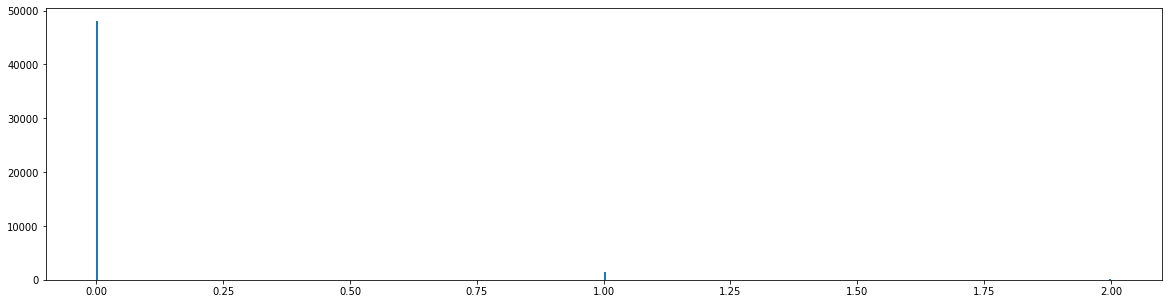

RetentionOffersAccepted


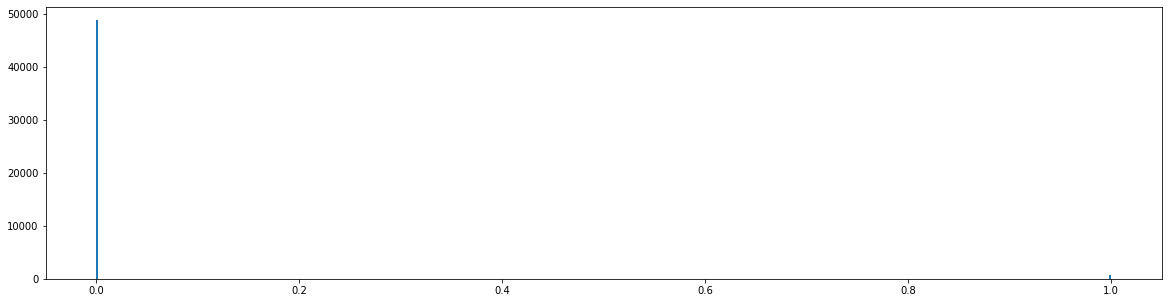

NewCellphoneUser


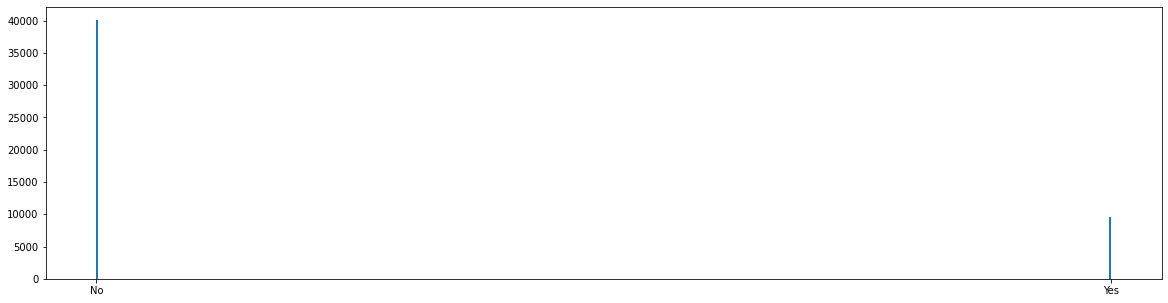

NotNewCellphoneUser


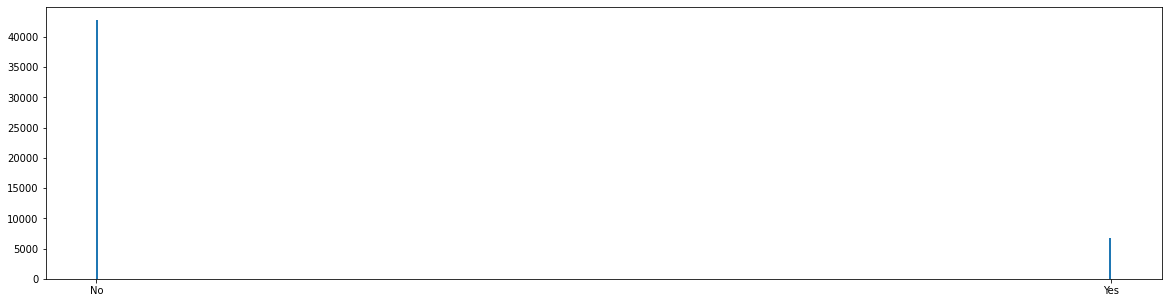

ReferralsMadeBySubscriber


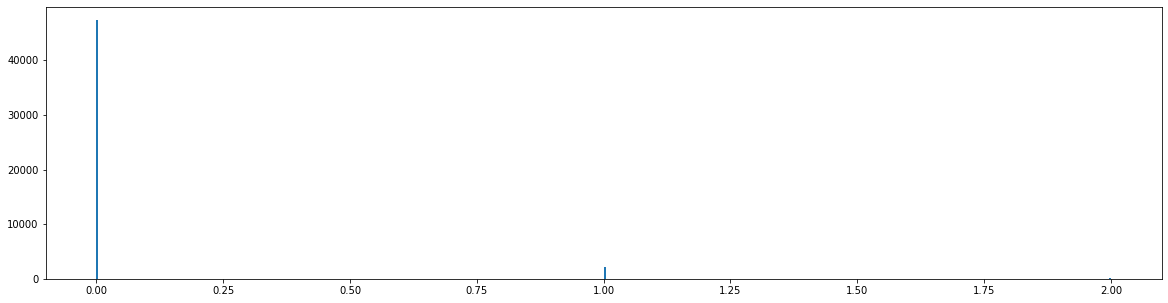

IncomeGroup


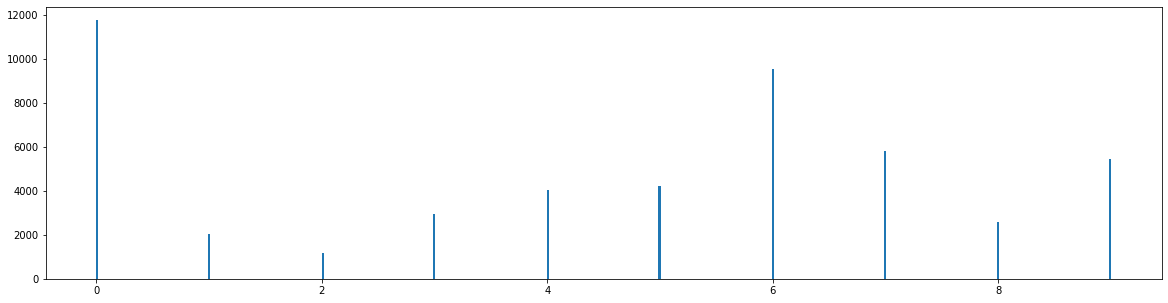

OwnsMotorcycle


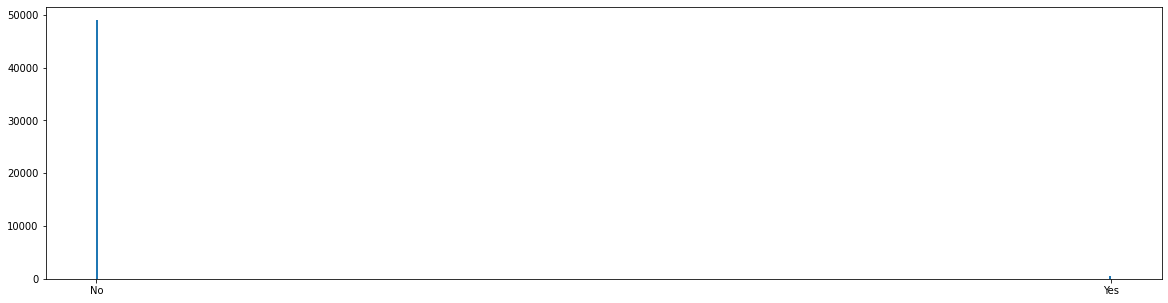

AdjustmentsToCreditRating


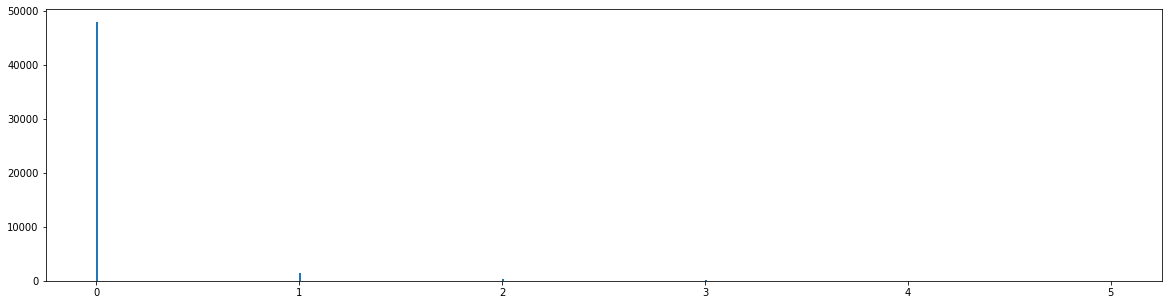

HandsetPrice


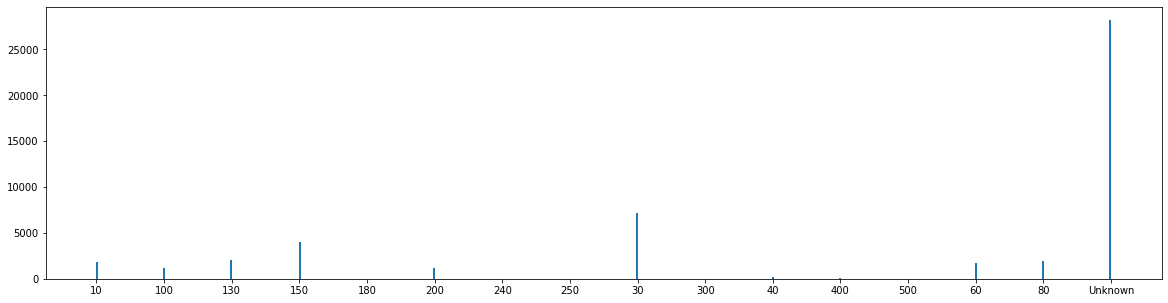

MadeCallToRetentionTeam


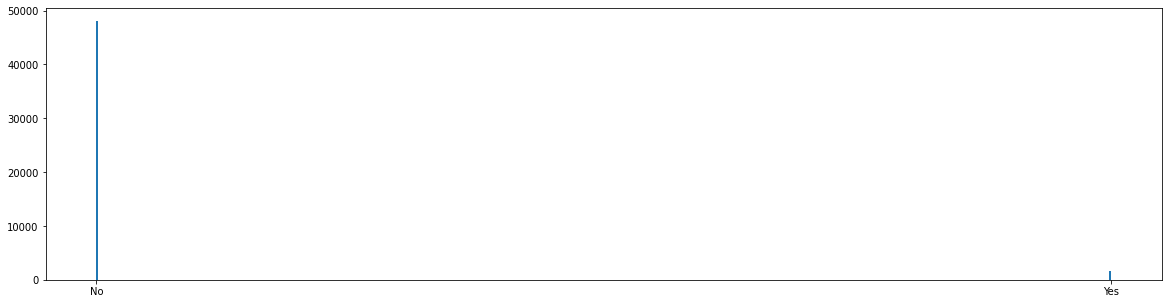

CreditRating


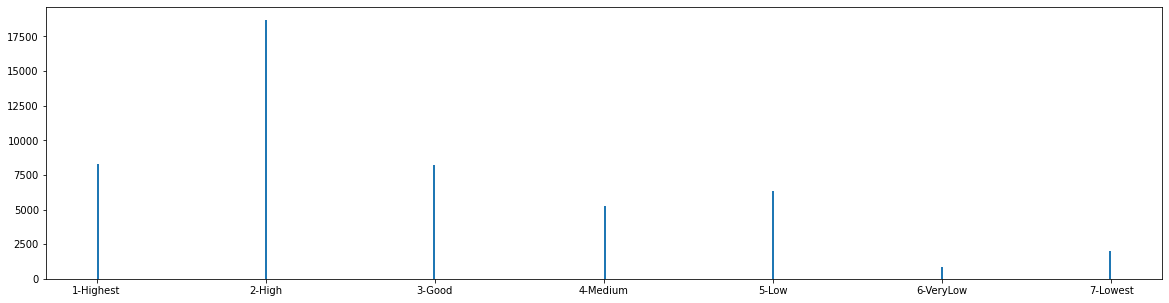

PrizmCode


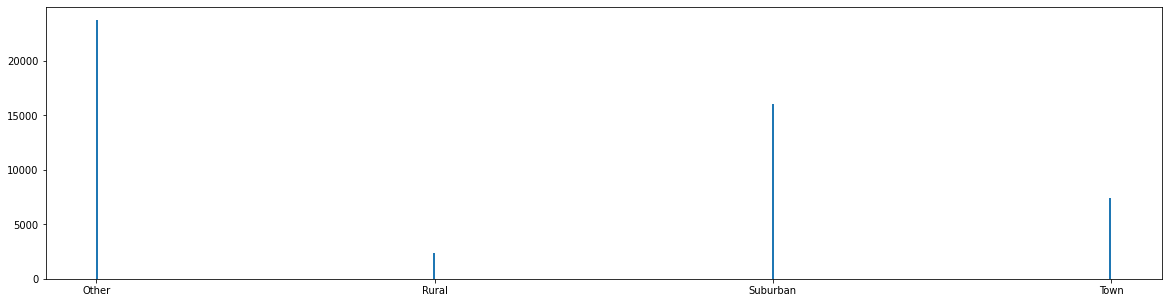

Occupation


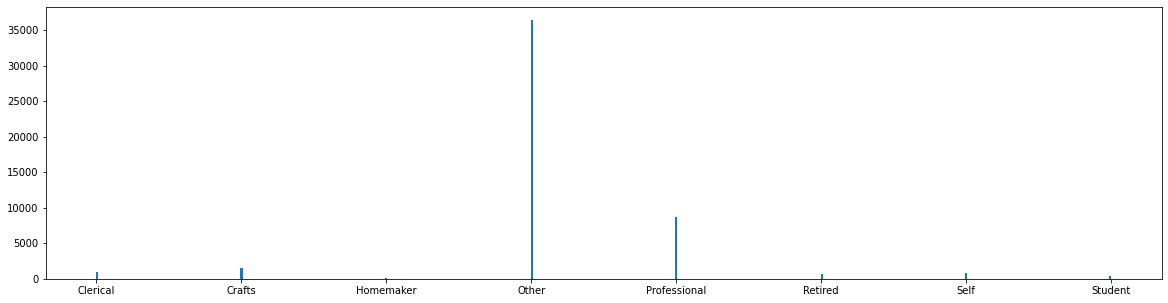

MaritalStatus


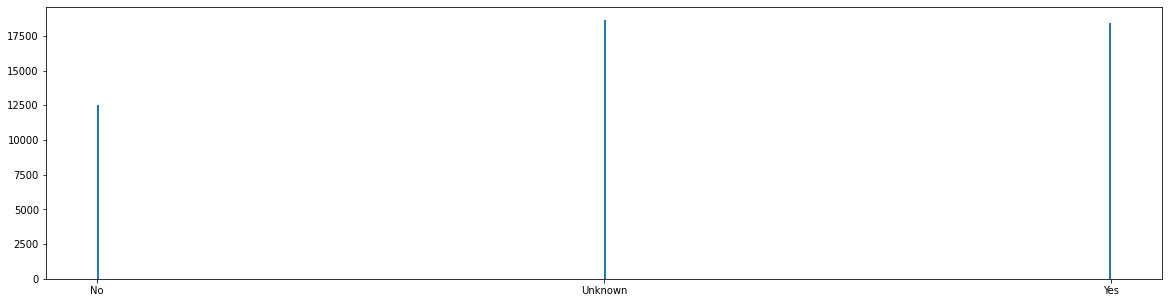

In [336]:
from scipy.stats import gaussian_kde, trimboth, trim1

for feature in full_df.columns:
    print(feature)
    
    data = prepare_data(df, feature)
    plt.figure(figsize = (20,5))
    plt.hist(data, bins=500)
    plt.show()

In [337]:
def describe_data(data: np.array, bins=50):
    print(pd.DataFrame(data).describe())
    
    plt.figure(figsize = (20,5))
    plt.hist(data, bins=bins, density=True)

    kde = gaussian_kde(data)
    tiks = np.arange(data.min(), data.max() + 1, 1)
    plt.plot(tiks, kde(tiks))
    plt.show()

    plt.boxplot(data)
    plt.show()

In [338]:
from scipy.stats import rv_continuous

class multi_modal_gen(rv_continuous):

    def _prep_params(self, *args):
        params = list(*args)
        if len(np.array(params).shape) == 1:
            params.append(1 - sum(params[2::3]))
            return np.array(params).reshape(-1, 3)
        else:
            params.append(np.ones(np.array(params).shape[1]) - np.sum(params[2::3], axis=0))
            return np.split(np.array(params), np.array(params).shape[0] // 3)

    def _ckeck_sorted(self, l):
        return all(l[i] <= l[i + 1] for i in range(len(l) - 1))

    def _ckeck_positive(self, l):
        return all(l[i] > 0 for i in range(len(l)))

    def _argcheck(self, *args):
        params = self._prep_params(args)

        means = params[:, 0]
        stdv = params[:, 1]
        weights = params[:, 2]

        return self._ckeck_sorted(means) and means[0] > 0 and \
               self._ckeck_positive(weights) and 0.9 <= sum(weights) <= 1.1 and \
               self._ckeck_positive(stdv)

    def _pdf(self, x, *args):
        params = self._prep_params(args)
        return np.sum(np.array([weight * norm.pdf(x, mean, stdv) for mean, stdv, weight in params]), axis=0)

    def _cdf(self, x, *args):
        params = self._prep_params(args)
        return np.sum(np.array([weight * norm.cdf(x, mean, stdv) for mean, stdv, weight in params]), axis=0)


two_modal = multi_modal_gen(a=-np.inf, b=np.inf, name='two_modal')
two_modal.numargs=5
two_modal.shapes = 'm0, v0, p0, m1, v1'

tri_modal = multi_modal_gen(a=-np.inf, b=np.inf, name='tri_modal')
tri_modal.numargs=8
tri_modal.shapes = 'm0, v0, p0, m1, v1, p1, m2, v2'

four_modal = multi_modal_gen(a=-np.inf, b=np.inf, name='four_modal')
four_modal.numargs=11
four_modal.shapes = 'm0, v0, p0, m1, v1, p1, m2, v2, p2, m3, v3'

In [330]:
def describe_distribution(data: np.array, dist, bins=50, k=5000, params=None):
    data = np.random.choice(data, k, replace=False)
    
#     p = dist.fit(data, method='MM')
#     print(p)
#     probplot(data, plot=plt, dist=dist(*p))
#     plt.show()

#     p = dist.fit(data, method='MLE')
#     print(p)
#     probplot(data, plot=plt, dist=dist(*p))
#     plt.show()

    if params is not None:
        p = dist.fit(data, *params, loc=0, scale=1)
        dist = dist(*p)
    else:
        p = dist.fit(data)
        dist=dist(*p)
    print(p)
    probplot(data, plot=plt, dist=dist)
    plt.show()

    print(kstest(data, dist.cdf))

    kde = gaussian_kde(data)
    tiks = np.arange(data.min(), data.max() + 1, 1)
    
    plt.figure(figsize = (20,5))
    plt.hist(data, bins=bins, density=True)
    plt.plot(tiks, kde(tiks), label='data')
    plt.plot(tiks, dist.pdf(tiks), label='estimation')
    plt.legend()
    plt.show()

## MonthlyRevenue - Mean monthly revenue

                 0
count 49504.000000
mean     57.096552
std      36.929138
min      -6.170000
25%      33.530000
50%      48.150000
75%      70.312500
max     275.140000


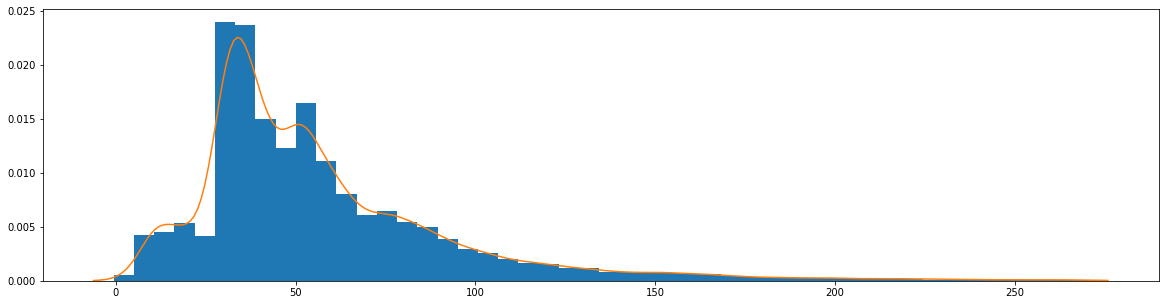

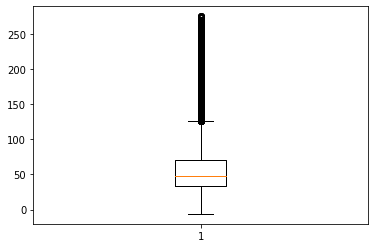

(6.6021900828843645, 0.2969235975593336, 0.024250655668066355, 21.86782044741213, 2.3345129069602866, 0.18898289356572506, 33.2032622749595, 13.040159263457156, 0.6329057437314438, 79.46032374621984, 34.234807133189435, -0.006928213805908776, 1.5238190488553554)


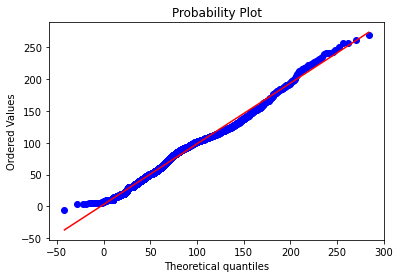

KstestResult(statistic=0.044431494157164866, pvalue=5.141813331230147e-09)


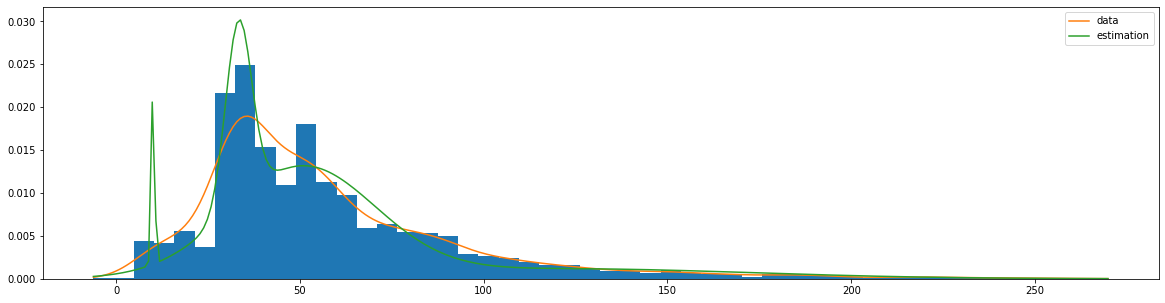

(12.818017312221428, 1.168287591322568, 0.17512659788828694, 19.207422632832554, 8.495887032204653, 0.667533704210046, 43.67737847355876, 19.21477492305064, 0.0030586077507218333, 2.5666591552614597)


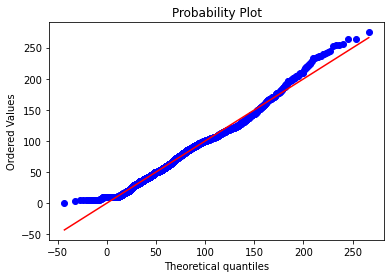

KstestResult(statistic=0.031998779137004885, pvalue=6.984121478428073e-05)


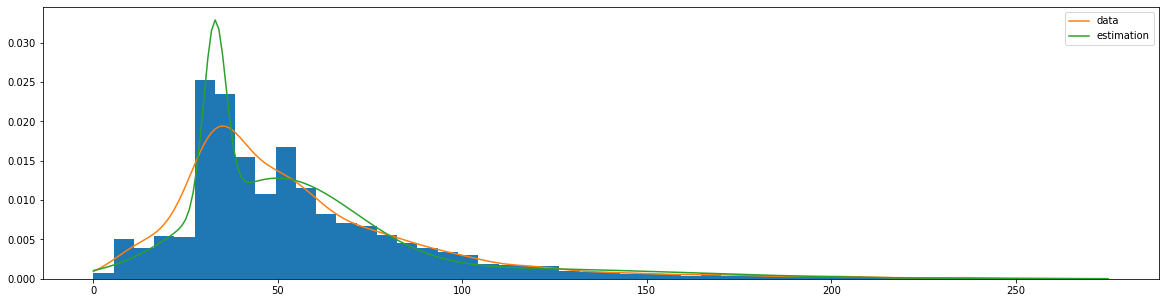

In [341]:
data = prepare_data(df=df, feature='MonthlyRevenue', left_quanlile = 0.0, right_quanlile = 0.005)
# find_distribution(data)
describe_data(data)
describe_distribution(data, four_modal, bins=50, params=[10, 7, 0.15, 35, 3, 0.3, 50, 5, 0.4, 75, 10], k=5000)
describe_distribution(data, tri_modal, bins=50, params=[10, 7, 0.3, 35, 3, 0.5, 50, 10], k=5000)

## 'mou_Mean' - Mean number of monthly minutes of use

                 0
count 49654.000000
mean    521.502799
std     512.343757
min       0.000000
25%     159.000000
50%     366.000000
75%     721.000000
max    3804.000000


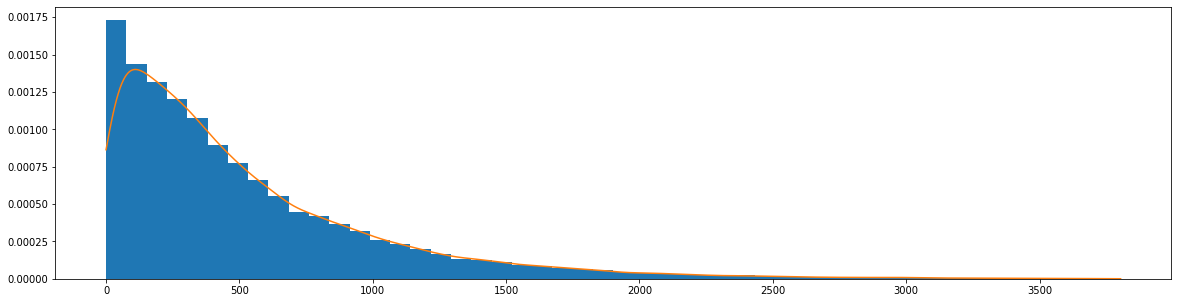

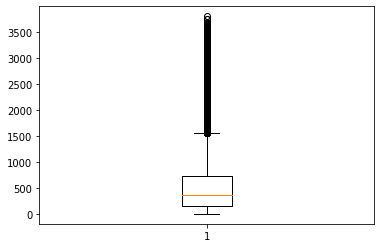

(0.0, 517.4796)


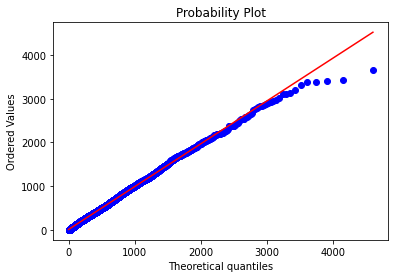

KstestResult(statistic=0.017637868453299455, pvalue=0.0880616351201684)


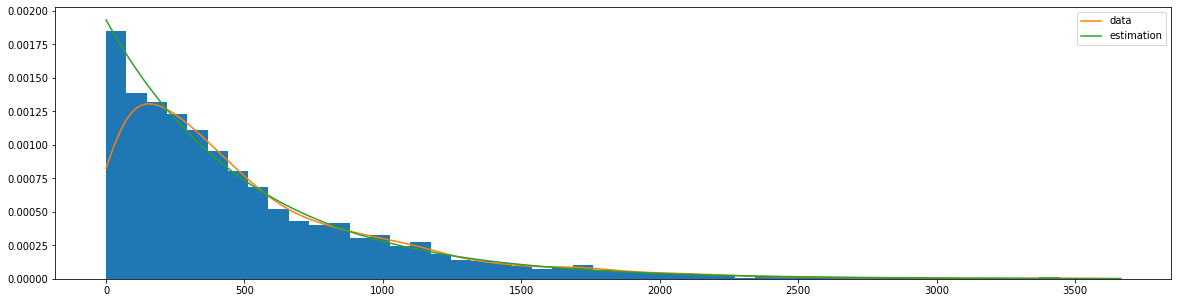

In [342]:
data = prepare_data(df=df, feature='MonthlyMinutes')
describe_data(data)
describe_distribution(data, expon)

## TotalRecurringCharge - 

                 0
count 49703.000000
mean     46.645655
std      22.939301
min      -6.000000
25%      30.000000
50%      45.000000
75%      60.000000
max     200.000000


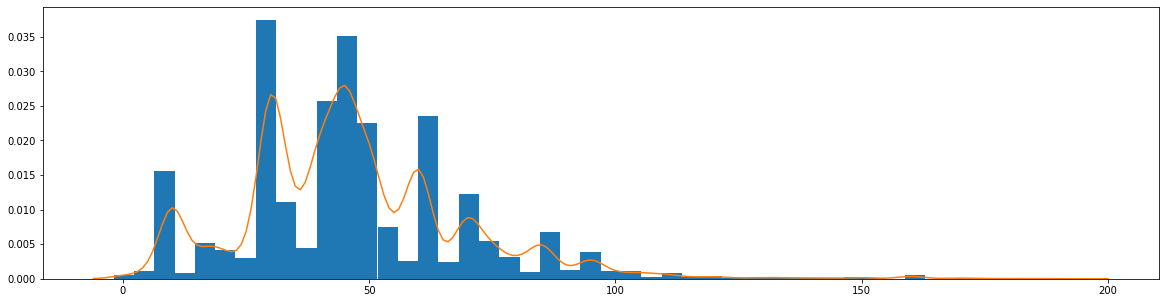

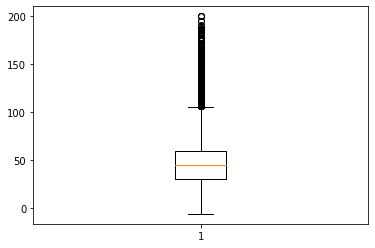

(9.489487128964583, 5.283846460834264e-16, 0.10063724026339896, 28.735005320945227, 4.64794673292999, 0.19156617114369537, 39.98827021342041, 10.180815274756021, 0.42574001889575863, 69.17638480112689, 22.419914449169173, 0.001605249662154604, 1.0536285696431298)


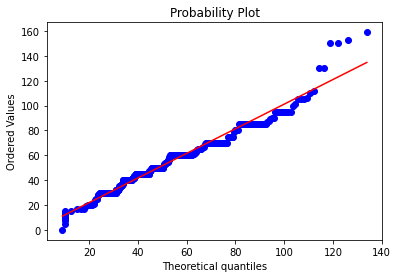

KstestResult(statistic=0.13409461389343835, pvalue=2.6594074483555698e-08)


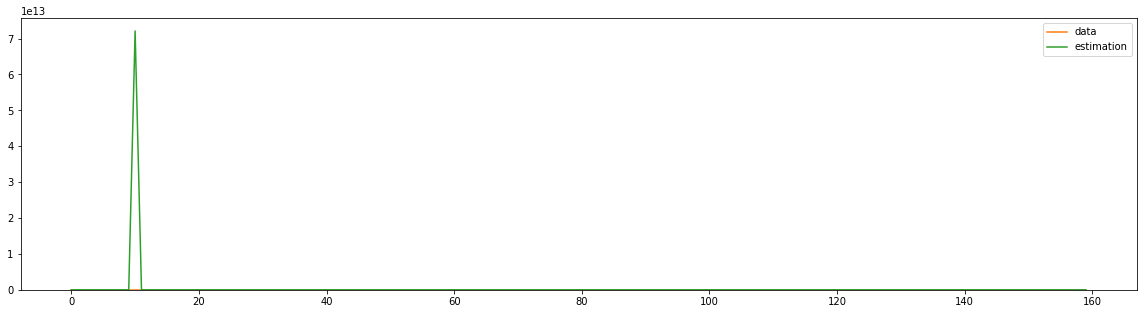

In [346]:
data = prepare_data(df=df, feature='TotalRecurringCharge', left_quanlile = 0.0, right_quanlile = 0.001)
describe_data(data)
describe_distribution(data, four_modal, bins=50, params=[10, 10, 0.3, 20, 10, 0.3, 40, 10, 0.3, 60, 10], k=500)

## OverageMinutes

                 0
count 44330.000000
mean     37.496052
std      66.687707
min       0.000000
25%       0.000000
50%       6.000000
75%      46.000000
max     445.000000


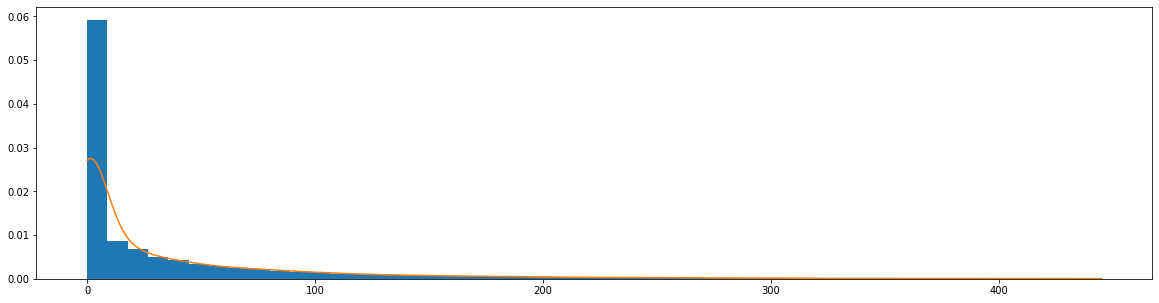

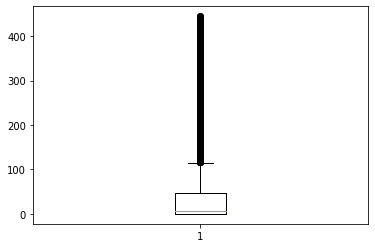

(2.1405242589863676, 1.9410241255210328, 5.300866043028313e-12, -3.8889829222639964e-10, 79.09550097614252)


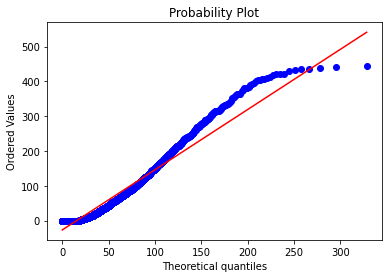

KstestResult(statistic=0.3945999999894754, pvalue=0.0)


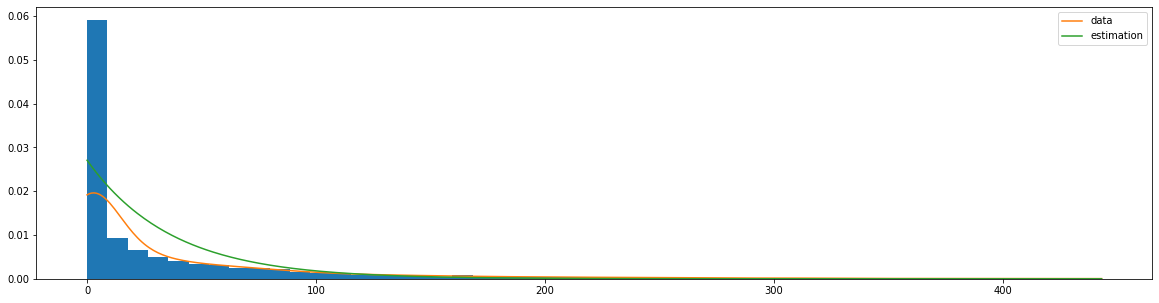

In [349]:
data = prepare_data(df=df, feature='OverageMinutes', left_quanlile = 0.1, right_quanlile = 0.01)
describe_data(data)
# find_distribution(data)
describe_distribution(data, genexpon, k=5000)

In [350]:
print(df.columns)

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

                 0
count 49206.000000
mean     -1.538369
std     213.671806
min    -844.000000
25%     -80.000000
50%      -4.000000
75%      66.000000
max    1470.000000


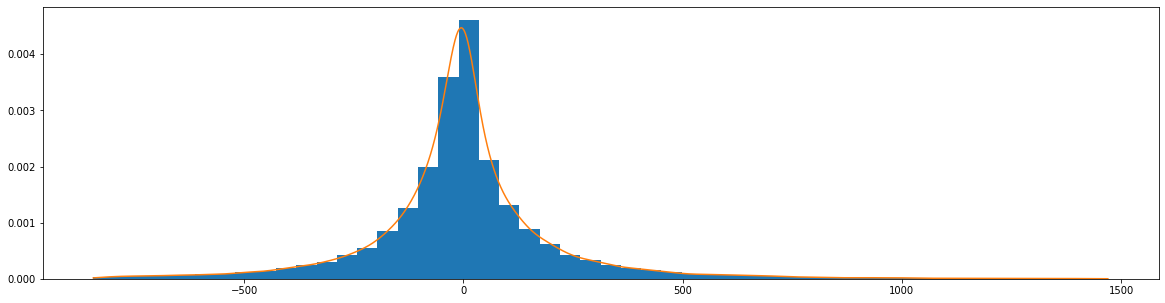

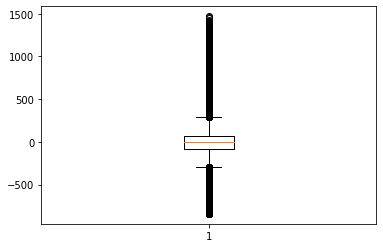

(-6.135249335335661, 70.11814747779508)


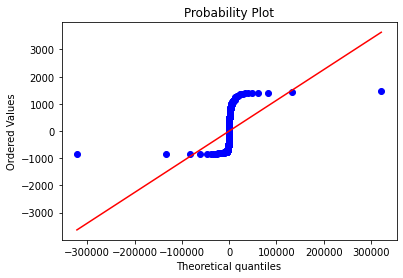

KstestResult(statistic=0.026639675469272206, pvalue=1.3438306615356904e-06)


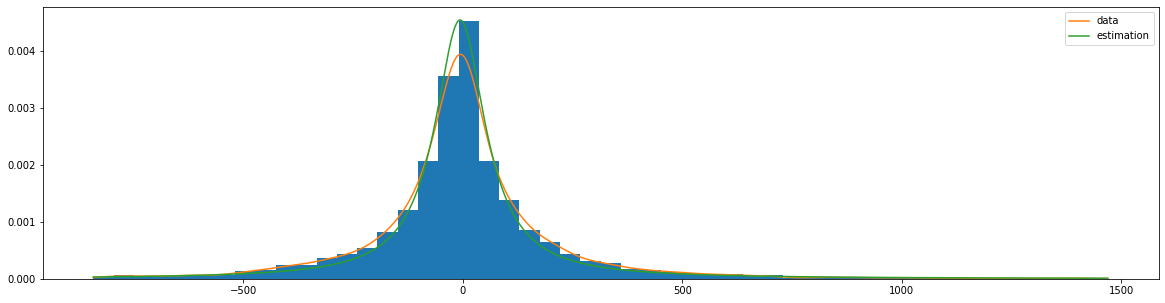

In [357]:
data = prepare_data(df=df, feature='PercChangeMinutes', left_quanlile = 0.01, right_quanlile = 0.001)
# find_distribution(data)
describe_data(data)
describe_distribution(data, cauchy, k=10000)

                 0
count 49206.000000
mean      1.043812
std       4.369181
min       0.000000
25%       0.000000
50%       0.000000
75%       0.300000
max      87.700000


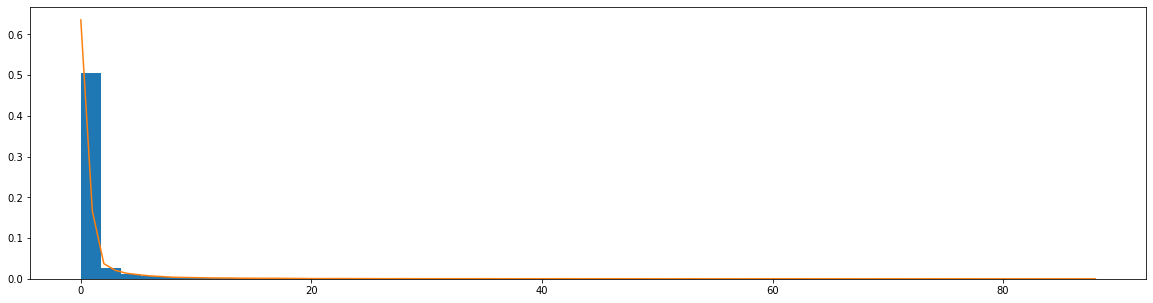

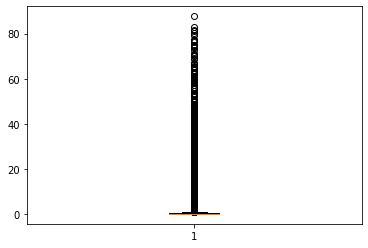

(0.0, 1.0883999999999998)


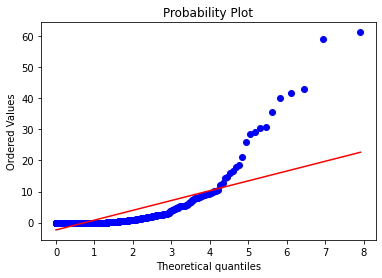

KstestResult(statistic=0.706, pvalue=0.0)


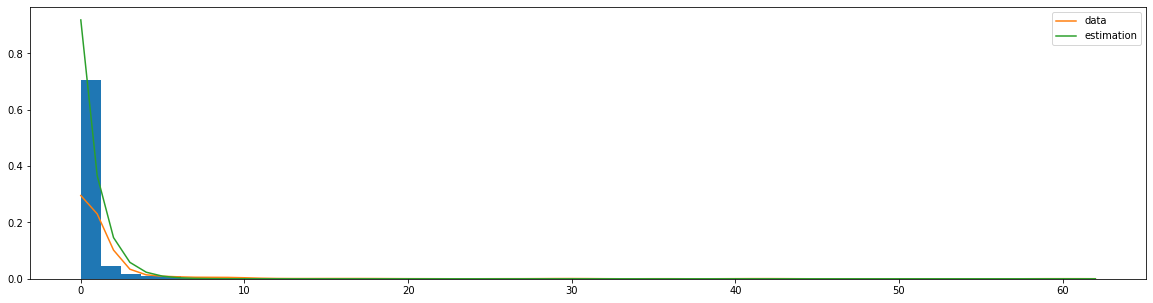

In [354]:
data = prepare_data(df=df, feature='RoamingCalls', left_quanlile = 0.01, right_quanlile = 0.001)
# find_distribution(data)
describe_data(data)
describe_distribution(data, expon, k=1000)

                 0
count 26653.000000
mean    391.948374
std     235.633346
min       0.000000
25%     229.000000
50%     351.000000
75%     534.000000
max    1234.000000


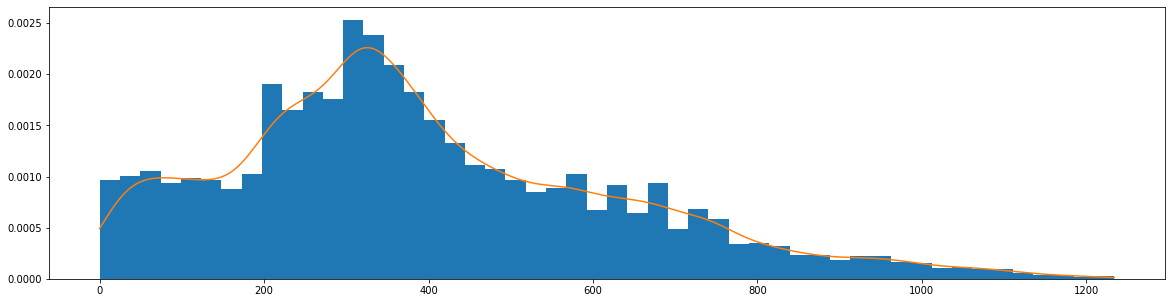

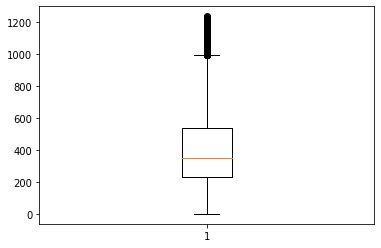

(-10.13437985582047, 3.3167863121815397, -382.36306144091895, 70.22813745699739)


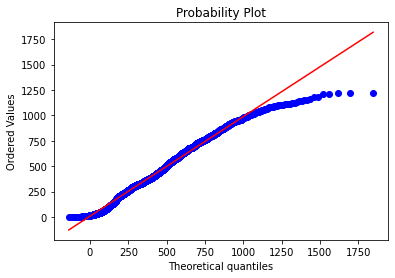

KstestResult(statistic=0.030909349420187082, pvalue=0.00013873453745086685)


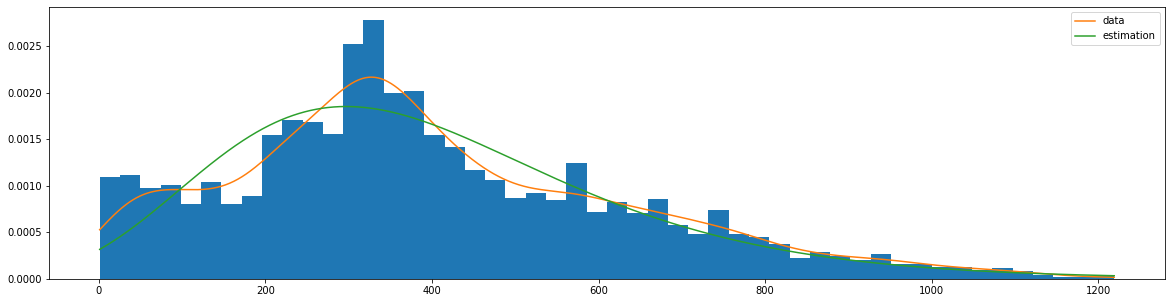

In [322]:
data = prepare_data(df=df, feature='eqpdays', left_quanlile = 0.001, right_quanlile = 0.001)

# find_distribution(data)
describe_data(data)
describe_distribution(data, johnsonsu)

                 0
count 26413.000000
mean      0.718872
std       2.160761
min       0.000000
25%       0.000000
50%       0.000000
75%       0.257500
max      21.000000


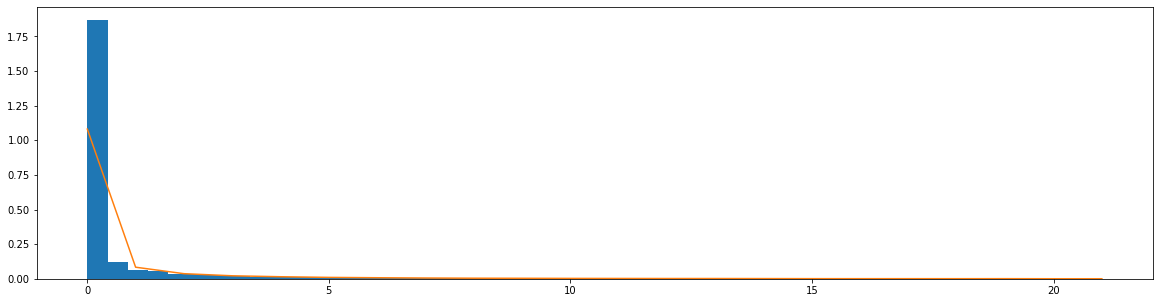

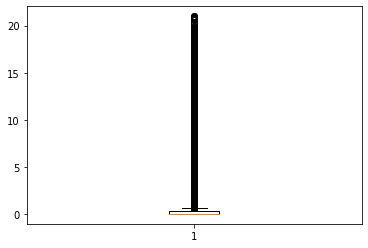

(26340.29781278863, -3.57631556204682e-10, 1.3081154938206304e-09)


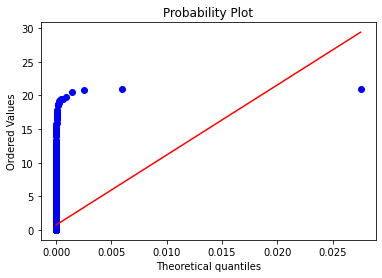

KstestResult(statistic=0.6191878678073864, pvalue=0.0)


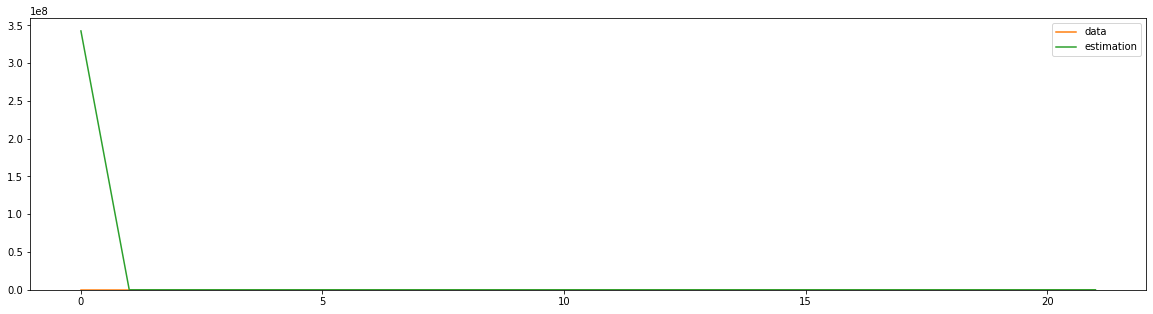

In [323]:
data = prepare_data(df=df, feature='roam_Mean', left_quanlile = 0.001, right_quanlile = 0.01)

# find_distribution(data, timeout=10)
describe_data(data)
describe_distribution(data, invgauss)